<h1>Aplicação do DBSCAN para aplicação de Scores aos Clientes</h1>

In [26]:
import pandas as pd 
import numpy as np 

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler 

import matplotlib.pyplot as plt 
import seaborn as sns

import warnings 

warnings.filterwarnings('ignore')

print('Loaded libs')

Loaded libs


In [27]:
data = pd.read_csv('storage/processed/dados_mean.csv', sep=',')

data.columns

Index(['leads_tempo_desde_evento_anterior_mean',
       'leads_tempo_desde_evento_anterior_std',
       'leads_tempo_desde_evento_anterior_75',
       'leads_tempo_desde_evento_anterior_max', 'leads_score_midia_mean',
       'leads_score_midia_std', 'leads_score_midia_min',
       'leads_score_midia_25', 'leads_score_midia_50', 'leads_score_midia_75',
       'leads_score_midia_max', 'leads_vg_mean', 'leads_vg_std',
       'leads_vg_min', 'leads_vg_25', 'leads_vg_50', 'leads_vg_75',
       'leads_vg_max', 'leads_m2_anuncio_mean', 'leads_m2_anuncio_std',
       'leads_m2_anuncio_25', 'leads_m2_anuncio_50', 'leads_m2_anuncio_75',
       'leads_m2_anuncio_max', 'leads_in_dorm_mean', 'leads_in_dorm_75',
       'leads_in_dorm_max', 'leads_dl_area_total_mean',
       'leads_dl_area_total_std', 'leads_dl_area_total_50',
       'leads_dl_area_total_75', 'leads_dl_area_total_max',
       'leads_in_garagens_totais_mean', 'leads_in_garagens_totais_25',
       'leads_in_garagens_totais_50', 'leads_

In [28]:
# Normalização

scaler = StandardScaler()

dados_padronizados = pd.DataFrame(scaler.fit_transform(data))

dados_padronizados

,0,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
0,-0.181652,-0.177487,-0.279661,-0.013228,0.291592,0.155749,-0.188173,-0.091067,0.098615,0.040614,...,0.090744,0.193494,0.031327,0.007287,0.102376,-0.015456,0.072649,0.007986,0.181916,-1.518841
1,0.090382,0.239893,-0.408850,0.232466,-0.013996,2.145612,-0.644735,-0.791049,-1.185797,1.493769,...,-0.028324,-0.065199,-0.019373,-0.009758,-0.116432,-0.015456,0.047810,-0.017879,0.155194,-1.518841
2,-0.410506,-0.380325,-0.417184,-0.170133,1.212822,0.150025,0.852681,0.753532,0.535568,1.493769,...,-0.052138,-0.007712,-0.041102,-0.019984,-0.028909,-0.015456,-0.051546,-0.029817,-0.225161,-1.518841
3,0.179665,0.011474,0.124575,0.065489,-0.397737,-0.928267,-0.558411,-0.320106,-0.298555,-0.339976,...,-0.004510,-0.065199,-0.012130,-0.013167,-0.072670,-0.015456,-0.026707,-0.019869,0.179027,-1.518841
4,-0.439112,-0.392041,-0.440105,-0.175698,2.713818,0.000000,3.165639,3.139340,2.203926,1.493769,...,-0.075951,-0.022084,-0.030238,-0.019984,-0.072670,-0.015456,-0.126062,-0.033796,-0.235753,-1.518841
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,-0.352318,-0.323511,-0.415101,-0.133557,0.278649,1.169796,-0.558411,-0.379302,0.535568,1.493769,...,-0.004510,-0.065199,-0.004888,-0.023393,0.189899,-0.015456,-0.051546,-0.017879,-0.169552,0.658397
4996,0.054921,-0.071044,-0.146305,-0.015613,-0.154761,0.276178,-0.683963,-0.320106,-0.272107,0.040614,...,0.043117,0.064147,-0.012130,-0.016575,0.014853,1.415625,-0.001868,-0.013900,0.195396,0.658397
4997,0.043053,-0.149182,0.257931,-0.086910,-0.282915,-0.423639,-0.558411,-0.702006,-0.272107,0.040614,...,-0.052138,-0.065199,-0.033859,-0.023393,-0.160193,-0.015456,-0.076384,-0.033796,-0.138738,0.658397
4998,-0.433629,-0.387566,-0.438021,-0.171723,-0.001415,-0.776186,-0.188173,-0.320106,0.098615,0.040614,...,-0.052138,0.136006,0.016841,-0.006349,0.189899,-0.015456,0.097487,-0.007931,-0.226846,0.658397


In [29]:
from sklearn.cluster import DBSCAN

# Aplicando DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=2)
data['cluster'] = dbscan.fit_predict(dados_padronizados)


In [30]:
data

,leads_tempo_desde_evento_anterior_mean,leads_tempo_desde_evento_anterior_std,leads_tempo_desde_evento_anterior_75,leads_tempo_desde_evento_anterior_max,leads_score_midia_mean,leads_score_midia_std,leads_score_midia_min,leads_score_midia_25,leads_score_midia_50,leads_score_midia_75,...,leads_opercao_locacao,leads_finalidade_residencial,leads_tipo_ocupacao_desocupado,leads_tipo_ocupacao_nao_informado,leads_tx_estado_count,leads_imobiliaria_count,leads_qtd_pesquisas,tempo_min_lead_ate_hj,tempo_max_lead_ate_hj,cluster
0,72.04,157.91,79.0,615.0,13893.17,10104.560000,4612.0,6446.0,13209.0,17174.0,...,18.0,20.0,9.0,6.0,1.0,9.0,24.0,1754.0,17.0,-1
1,147.45,462.86,17.0,1542.0,11569.33,17968.080000,841.0,841.0,1554.0,32313.0,...,0.0,6.0,4.0,1.0,1.0,8.0,11.0,1643.0,17.0,-1
2,8.60,9.71,13.0,23.0,20898.67,10081.940000,13209.0,13209.0,17174.0,32313.0,...,4.0,0.0,1.0,3.0,1.0,4.0,5.0,63.0,17.0,-1
3,172.20,295.97,273.0,912.0,8651.17,5820.760000,1554.0,4612.0,9605.0,13209.0,...,0.0,8.0,3.0,2.0,1.0,5.0,10.0,1742.0,17.0,-1
4,0.67,1.15,2.0,2.0,32313.00,9489.073329,32313.0,32313.0,32313.0,32313.0,...,3.0,3.0,1.0,2.0,1.0,1.0,3.0,19.0,17.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,24.73,51.22,14.0,161.0,13794.75,14111.860000,1554.0,4138.0,17174.0,32313.0,...,0.0,10.0,0.0,8.0,1.0,4.0,11.0,294.0,18.0,-1
4996,137.62,235.68,143.0,606.0,10498.88,10580.470000,517.0,4612.0,9845.0,17174.0,...,9.0,8.0,2.0,4.0,2.0,6.0,13.0,1810.0,18.0,-1
4997,134.33,178.59,337.0,337.0,9524.33,7814.940000,1554.0,1554.0,9845.0,17174.0,...,0.0,2.0,0.0,0.0,1.0,3.0,3.0,422.0,18.0,-1
4998,2.19,4.42,3.0,17.0,11665.00,6421.750000,4612.0,4612.0,13209.0,17174.0,...,14.0,16.0,5.0,8.0,1.0,10.0,16.0,56.0,18.0,224


In [31]:
# Atribuindo um score de 0 a 100 para cada cliente com base no cluster
data['score'] = 100 - (data['cluster'] * 33)  # Exemplo de mapeamento (quanto maior o número do cluster, menor o score)

# Normalizando o score entre 0 e 100 (caso você queira usar uma outra fórmula)
data['score_normalized'] = 100 * (data['score'] - data['score'].min()) / (data['score'].max() - data['score'].min())

print(data[['cluster', 'score_normalized']])


      cluster  score_normalized
0          -1        100.000000
1          -1        100.000000
2          -1        100.000000
3          -1        100.000000
4           0         99.559471
...       ...               ...
4995       -1        100.000000
4996       -1        100.000000
4997       -1        100.000000
4998      224          0.881057
4999       -1        100.000000

[5000 rows x 2 columns]


In [32]:
# Visualizando os resultados
print(data[['cluster', 'score_normalized']])

      cluster  score_normalized
0          -1        100.000000
1          -1        100.000000
2          -1        100.000000
3          -1        100.000000
4           0         99.559471
...       ...               ...
4995       -1        100.000000
4996       -1        100.000000
4997       -1        100.000000
4998      224          0.881057
4999       -1        100.000000

[5000 rows x 2 columns]


In [33]:
data['score_normalized'].value_counts()

score_normalized
100.000000    3430
60.352423      129
55.947137       70
56.387665       48
60.792952       44
              ... 
80.616740        2
31.718062        2
80.176211        2
79.735683        2
0.000000         2
Name: count, Length: 228, dtype: int64

In [34]:
data.tail(20)

,leads_tempo_desde_evento_anterior_mean,leads_tempo_desde_evento_anterior_std,leads_tempo_desde_evento_anterior_75,leads_tempo_desde_evento_anterior_max,leads_score_midia_mean,leads_score_midia_std,leads_score_midia_min,leads_score_midia_25,leads_score_midia_50,leads_score_midia_75,...,leads_tipo_ocupacao_desocupado,leads_tipo_ocupacao_nao_informado,leads_tx_estado_count,leads_imobiliaria_count,leads_qtd_pesquisas,tempo_min_lead_ate_hj,tempo_max_lead_ate_hj,cluster,score,score_normalized
4980,311.64,609.380000,141.0,1688.0,20338.80,14574.700000,1554.0,13209.0,17174.0,32313.0,...,1.0,2.0,2.0,8.0,11.0,3450.0,18.0,-1,133,100.000000
4981,0.00,0.000000,0.0,0.0,7381.50,8241.330000,1554.0,1554.0,13209.0,13209.0,...,0.0,1.0,1.0,2.0,2.0,18.0,18.0,171,-5543,24.229075
4982,397.67,371.570000,736.0,736.0,6998.00,5865.230000,1554.0,1554.0,6231.0,13209.0,...,0.0,1.0,1.0,3.0,3.0,1211.0,18.0,-1,133,100.000000
4983,44.43,89.990000,44.0,245.0,15191.50,2803.680000,13209.0,13209.0,17174.0,17174.0,...,6.0,0.0,1.0,5.0,7.0,330.0,18.0,90,-2870,59.911894
4984,0.00,287.587008,0.0,0.0,7.00,9489.073329,7.0,7.0,7.0,7.0,...,0.0,0.0,0.0,1.0,1.0,18.0,18.0,89,-2837,60.352423
4985,81.50,115.260000,163.0,163.0,17174.00,9489.073329,17174.0,17174.0,17174.0,17174.0,...,2.0,0.0,1.0,2.0,2.0,181.0,18.0,-1,133,100.000000
4986,39.50,55.860000,79.0,79.0,9605.00,9489.073329,9605.0,9605.0,9605.0,9605.0,...,1.0,0.0,1.0,2.0,2.0,97.0,18.0,-1,133,100.000000
4987,8.00,11.310000,16.0,16.0,192.00,9489.073329,192.0,192.0,192.0,192.0,...,0.0,1.0,1.0,1.0,2.0,34.0,18.0,187,-6071,17.180617
4988,0.50,0.710000,1.0,1.0,17174.00,9489.073329,17174.0,17174.0,17174.0,17174.0,...,0.0,1.0,1.0,2.0,2.0,19.0,18.0,131,-4223,41.850220
4989,0.00,287.587008,0.0,0.0,13209.00,9489.073329,13209.0,13209.0,13209.0,13209.0,...,0.0,1.0,1.0,1.0,1.0,18.0,18.0,121,-3893,46.255507


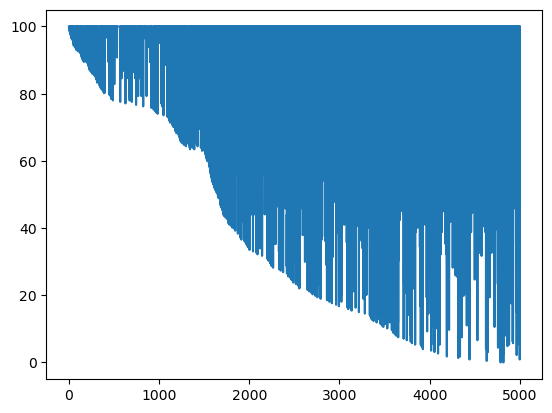

In [37]:
plt.plot(data['score_normalized'])

<h3>Aplicaçao da PCA para reduzir e Visualizar os Scores</h3>

In [35]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reduzindo para 2D usando PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(dados_padronizados)

df_pca

array([[ 0.02462279, -0.61046634],
       [ 0.03973243, -0.10582196],
       [ 0.04921278,  1.27094296],
       ...,
       [-0.21904386, -0.10477526],
       [ 0.02131448,  0.09876792],
       [ 0.45452717,  0.98794946]])

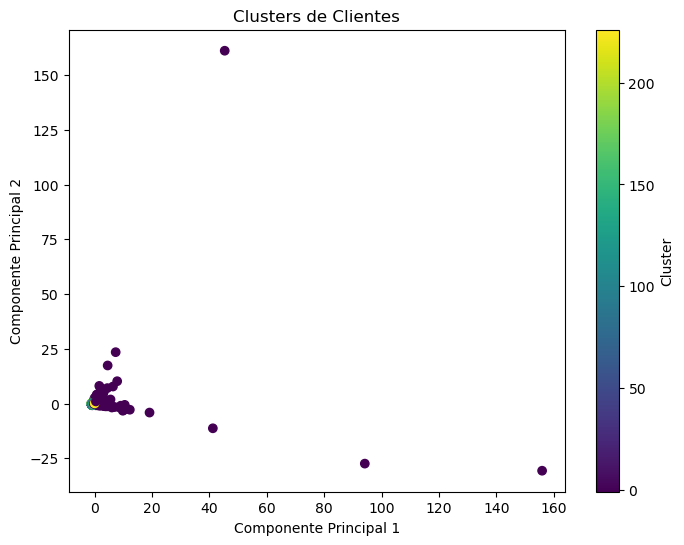

In [36]:
# Plotando os clusters
plt.figure(figsize=(8, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=data['cluster'], cmap='viridis')
plt.title("Clusters de Clientes")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.colorbar(label='Cluster')
plt.show()
